In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

#These imports were constructed
from wrangle import wrangle_zillow, train_validate

#Tools to build machine learning models and reports
from sklearn.model_selection import train_test_split

#Removes warnings and imporves asthenics
import warnings
#warnings.filterwarnings("ignore")

#Sets an option to show all columns
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None


Source:
- https://www.kaggle.com/competitions/zillow-prize-1/overvie

Target column = taxvaluedollarcnt

Dropping all null values had a small affected on all fields except the upper outliers in 'taxvaluedollarcnt'/'tax_value'.
- Must adjust wrangle.py to see the results of the code below
- Measured by viewing the difference of a before and after DataFrame.describe()
- `after_df = before_df.dropna()`
- `change = round(before_df.describe - after_df.describe,2)`

In [2]:
df = wrangle_zillow()

In [3]:
schema = pd.read_excel('zillow_data_dictionary.xlsx')
#schema
schema.loc[[4, 3, 11, 51, 50, 54, 17]]

,Feature,Description
4,'bedroomcnt',Number of bedrooms in home
3,'bathroomcnt',Number of bathrooms in home including fractional bathrooms
11,'calculatedfinishedsquarefeet',Calculated total finished living area of the home
51,'taxvaluedollarcnt',The total tax assessed value of the parcel
50,'yearbuilt',The Year the principal residence was built
54,'taxamount',The total property tax assessed for that assessment year
17,'fips',Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details


In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140235 entries, 0 to 2140234
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2140235 non-null  float64
 1   bathrooms   2140235 non-null  float64
 2   sqft        2140235 non-null  float64
 3   tax_value   2140235 non-null  float64
 4   year_built  2140235 non-null  float64
 5   taxamount   2140235 non-null  float64
 6   fips        2140235 non-null  float64
dtypes: float64(7)
memory usage: 114.3 MB


bedrooms


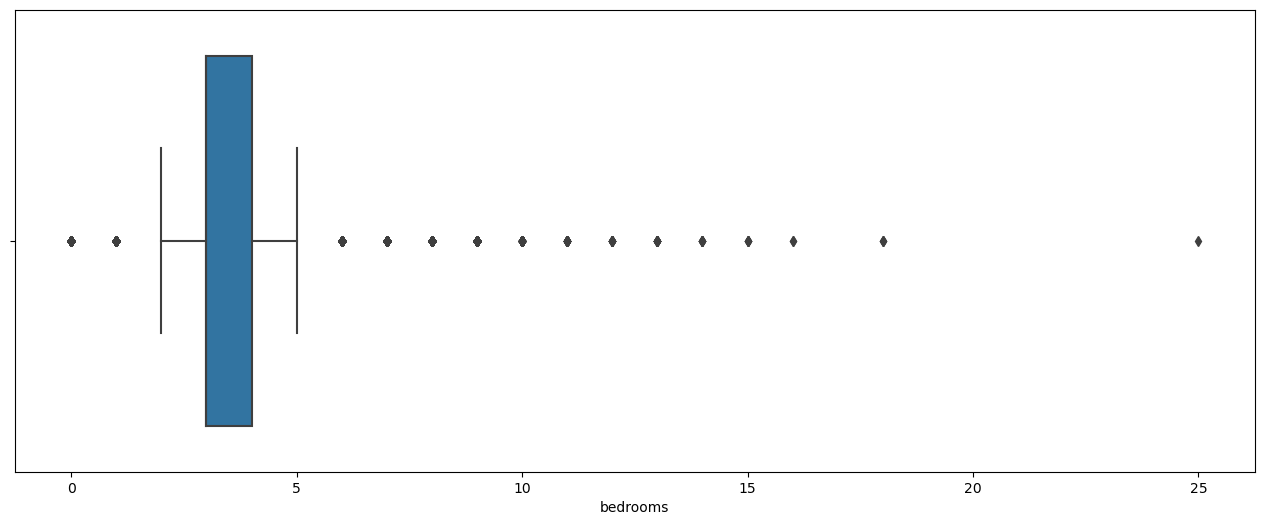

bathrooms


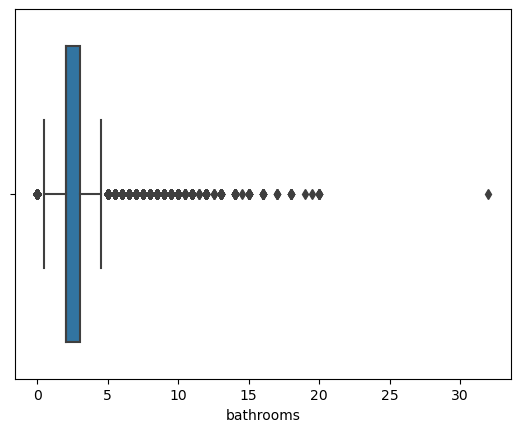

sqft


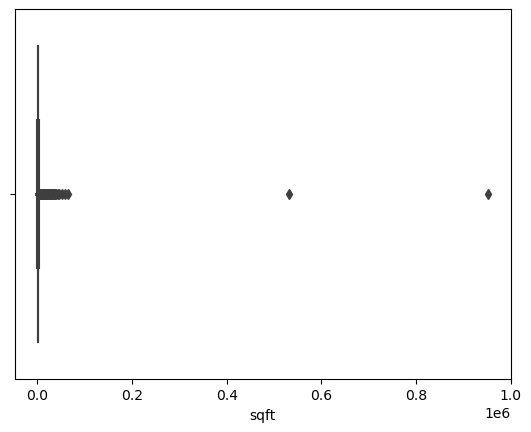

tax_value


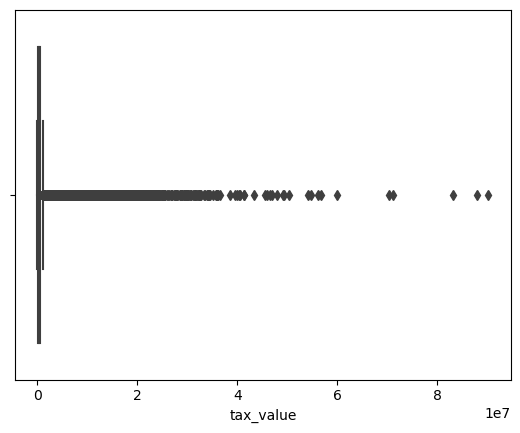

year_built


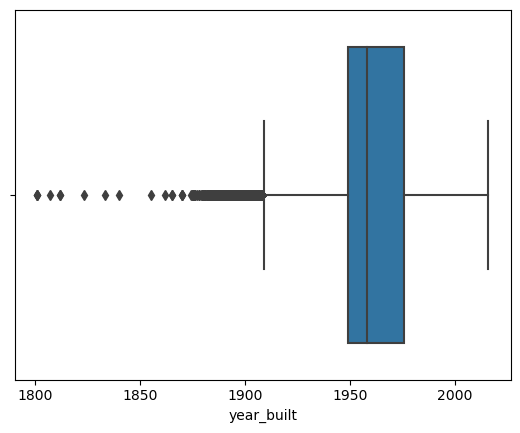

In [9]:
# Plot the distributions
plt.figure(figsize=(16, 6))

# List of columns
cols = ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built']

for col in cols:
    print(col)
    sns.boxplot(x=col, data=df)
    plt.show()

In [6]:
train, val, test = train_validate(df)

In [7]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,taxamount,fips
2045960,3.0,2.0,1191.0,388527.0,1956.0,4790.55,6037.0
1345346,3.0,2.0,1198.0,229705.0,1956.0,3543.05,6037.0
761422,6.0,3.0,2959.0,251184.0,1951.0,2850.76,6037.0
1667958,4.0,3.0,2644.0,525255.0,1990.0,6347.26,6059.0
564887,6.0,4.0,3243.0,174603.0,1972.0,2222.84,6059.0
